In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import plotly.express as px

In [71]:
# loading file
hotel_df = pd.read_csv('/Users/georgekalfas/Downloads/Argyriou Assignments/Individual assignment/Hotel Reservations.csv')

In [72]:
# checking the dataframe
hotel_df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [73]:
# displaying the shape of the dataset
print("Shape of the hotel dataset:", hotel_df.shape)
print("-----------------------------------------------")

# checking for missing values
print("Missing values in the hotel dataset:")
print(hotel_df.isnull().sum())
print("-----------------------------------------------")

# calculating summary statistics
print("Summary statistics of the hotel df dataset:")
description = hotel_df.describe()
description = description.round(2)
print(description)

Shape of the hotel dataset: (36275, 19)
-----------------------------------------------
Missing values in the hotel dataset:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
-----------------------------------------------
Summary statisti

In [74]:
# Descriptive statistics of the selected columns
# columns_for_stats = hotel_df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
#                                    'arrival_year', 'arrival_month', 'arrival_date',
#                                    'market_segment_type', 'no_of_special_requests', 'booking_status'], axis=1)

# print("Descriptive statistics of the selected columns:")
# description = columns_for_stats.describe()
# description = description.round(2)
# print(description)

Descriptive statistics of the selected columns:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count     36275.000       36275.000             36275.000          36275.000   
mean          1.845           0.105                 0.811              2.204   
std           0.519           0.403                 0.871              1.411   
min           0.000           0.000                 0.000              0.000   
25%           2.000           0.000                 0.000              1.000   
50%           2.000           0.000                 1.000              2.000   
75%           2.000           0.000                 2.000              3.000   
max           4.000          10.000                 7.000             17.000   

       required_car_parking_space  lead_time  repeated_guest  \
count                   36275.000  36275.000       36275.000   
mean                        0.031     85.233           0.026   
std                         0.173     8

# Correlation heatmap

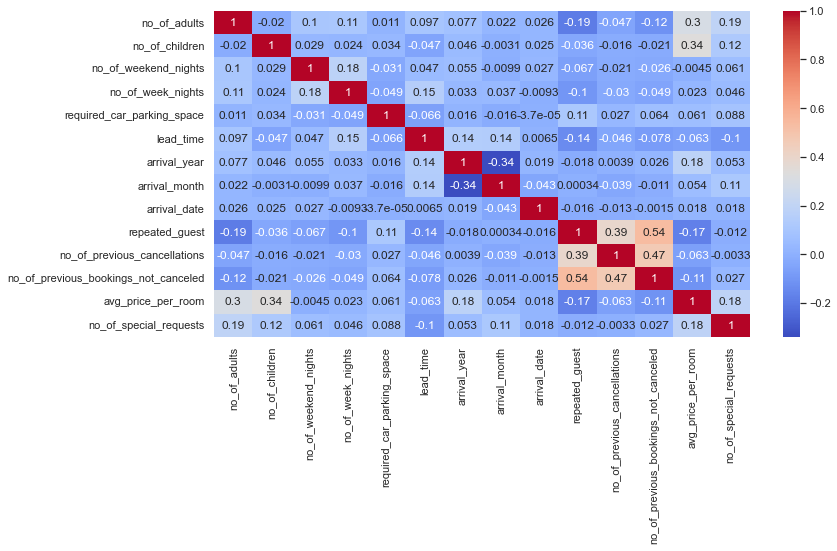

In [75]:
# correlation heatmap of my dataframe 
plt.figure(figsize=(12, 6))
corr = hotel_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [76]:
# # printing the correlation as a table
# print("Correlation table of the hotel dataset:")
# print(hotel_df.corr())

Correlation table of the hotel dataset:
                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886

# Exploratory Analysis of the Dataset (EDA)

In [77]:
# calculating the sum of no_of_adults for every month
print("Sum of no_of_adults for every month:")
print(hotel_df.groupby('arrival_month')['no_of_adults'].sum())

Sum of no_of_adults for every month:
arrival_month
1     1651
2     2888
3     4432
4     5178
5     4782
6     5663
7     5791
8     7651
9     8493
10    9504
11    5164
12    5729
Name: no_of_adults, dtype: int64


In [ ]:
# plotting the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='arrival_year', data=hotel_df)
plt.title('Number of bookings in each arrival year')

# adding count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
# average number of adults for bookings
avg_adults_per_room_type = hotel_df.groupby('room_type_reserved')['no_of_adults'].mean() 
print(avg_adults_per_room_type)

In [ ]:
# visualizing the average number of adults per room
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_adults_per_room_type.index, y=avg_adults_per_room_type.values)
plt.title('Average number of adults per room type')
plt.xlabel('Room type')
plt.ylabel('Average number of adults')
plt.show()

In [ ]:
# average number of children for bookings
avg_children_per_room_type = hotel_df.groupby('room_type_reserved')['no_of_children'].mean() 
print(avg_children_per_room_type)

In [ ]:
# visualizing the average number of children per room
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_children_per_room_type.index, y=avg_children_per_room_type.values)
plt.title('Average number of children per room type')
plt.xlabel('Room type')
plt.ylabel('Average number of children')
plt.show()

In [ ]:
# value counts for bookings per month
monthly_bookings = hotel_df['arrival_month'].value_counts().sort_index().reset_index()
monthly_bookings.columns = ['Month', 'Number of Bookings']

fig = px.bar(
    monthly_bookings,
    x='Month',
    y='Number of Bookings',
    color='Number of Bookings',
    color_continuous_scale='blues',
    labels={'Number of Bookings': '# of Bookings'},
    title='Bookings per month'
)

fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='# of Bookings'),
    xaxis_tickangle=-45,
    bargap=0.2,
    height=500,
    width=800
)

fig.show()

In [ ]:
# cancellations per month
cancellations_by_month = hotel_df[hotel_df['booking_status'] == "Canceled"]['arrival_month'].value_counts().sort_index()
print(cancellations_by_month)

# creating the figure
plt.figure(figsize=(10, 6))
cancellations_by_month.plot(kind='bar', color='salmon')
plt.title('Cancelations per month')
plt.xlabel('Month')
plt.ylabel('# of Cancelations')
plt.xticks(rotation=45)
plt.grid(axis='y')

# plotting the graph
plt.tight_layout()
plt.show()

In [ ]:
# value counts for room type
room_type_counts = hotel_df['room_type_reserved'].value_counts()
print(room_type_counts)

# plotting the graph
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Room type counts')
plt.xlabel('Room type')
plt.ylabel('# of bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# hotel_df.groupby('arrival_month')['avg_price_per_room'].mean().plot(kind='bar', color='skyblue')
# plt.title('Average price per month')
# plt.xlabel('Month')
# plt.ylabel('Average price')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

In [ ]:
# average price of rooms per month
avg_price_per_month = hotel_df.groupby('arrival_month')['avg_price_per_room'].mean()
print(avg_price_per_month)

# plotting the graph
plt.figure(figsize=(10, 6))
avg_price_per_month.plot(kind='bar', color='skyblue')
plt.title('Average price per month')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# type of meal plan selected by each booking
meal_plan_counts = hotel_df['type_of_meal_plan'].value_counts()
print(meal_plan_counts)

# plotting the graph
plt.figure(figsize=(10, 6))
meal_plan_counts.plot(kind='bar', color='skyblue')
plt.title('Meal plan counts')
plt.xlabel('Meal plan')
plt.ylabel('# of bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# cost per room
cost_per_room = hotel_df.groupby('room_type_reserved')['avg_price_per_room'].mean()
print(cost_per_room)

plt.figure(figsize=(10, 6))

# Create a bar plot for cost per room
cost_per_room.plot(kind='bar', color='skyblue', label='Average Cost')

# Add a line plot to show the trend
plt.plot(cost_per_room.index, cost_per_room.values, marker='o', color='orange', linestyle='-', label='Trend')

plt.title('Cost per room')
plt.xlabel('Room type')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# costs per room in different months
cost_per_room_month = hotel_df.groupby(['arrival_month', 'room_type_reserved'])['avg_price_per_room'].mean()
print(cost_per_room_month)

# reseting the index to convert the grouped data back into a DataFrame
cost_per_room_month = cost_per_room_month.reset_index()

# creating a bar plot for each room type and manage legend
plt.figure(figsize=(15, 8))
sns.barplot(
    x='arrival_month',
    y='avg_price_per_room',
    hue='room_type_reserved',
    data=cost_per_room_month,
    palette='viridis',
)

plt.legend(title='Room Type', loc='upper right', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.title('Cost per room per month for different room types')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# breakdown of bookings by customer category: repeat or new customers
customer_category_counts = hotel_df['repeated_guest'].value_counts()

plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(customer_category_counts, labels=customer_category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Category Breakdown')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# number of required parking space per year
parking_space_per_year = hotel_df.groupby('arrival_year')['required_car_parking_space'].sum()
print(parking_space_per_year)

plt.figure(figsize=(10, 6))

# using a line plot for better visualization of trend
plt.plot(parking_space_per_year.index, parking_space_per_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Parking Space Required per Year')
plt.xlabel('Year')
plt.ylabel('Number of Parking Spaces')
plt.xticks(parking_space_per_year.index, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# number of bookings per year during weekned nights & 
weekend_nights_per_year = hotel_df.groupby('arrival_year')['no_of_weekend_nights'].sum()
print(weekend_nights_per_year)

# plotting the graph
plt.figure(figsize=(10, 6))
weekend_nights_per_year.plot(kind='bar', color='skyblue')
plt.title('Weekend nights per year')
plt.xlabel('Year')
plt.ylabel('# of weekend nights')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# number of bookings per year during week nights and weekend nights
week_nights_per_year = hotel_df.groupby('arrival_year')['no_of_week_nights'].sum()
print(week_nights_per_year)
weekend_nights_per_year = hotel_df.groupby('arrival_year')['no_of_weekend_nights'].sum()
print(weekend_nights_per_year)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(week_nights_per_year))

plt.bar(index, week_nights_per_year, bar_width, label='Week Nights', color='skyblue')
plt.bar(index + bar_width, weekend_nights_per_year, bar_width, label='Weekend Nights', color='salmon')

plt.xlabel('Year')
plt.ylabel('Number of Nights')
plt.title('Comparison of Week Nights and Weekend Nights per Year')
plt.xticks(index + bar_width / 2, week_nights_per_year.index)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# average days in advance to make the booking
avg_days_in_advance = hotel_df.groupby('arrival_year')['lead_time'].mean()

# creating a donut chart
plt.figure(figsize=(8, 8))

# plotting a pie chart
plt.pie(avg_days_in_advance, labels=avg_days_in_advance.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Average days in advance to make the booking')

# drawing a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
# sum of number of special request per year
special_requests_per_booking = hotel_df.groupby('arrival_year')['no_of_special_requests'].sum()
print(special_requests_per_booking)

# plotting the graph with reversed axes
plt.figure(figsize=(10, 6))
special_requests_per_booking.sort_values().plot(kind='barh', color='skyblue') 
plt.title('Special requests per booking')
plt.xlabel('# of special requests')
plt.ylabel('Year')
plt.grid(axis='x')  # Grid along the x-axis
plt.show()

In [ ]:
# calculating value counts for special requests
counts = hotel_df['no_of_special_requests'].value_counts()

# determining the index of the largest slice
largest_slice_index = counts.idxmax()

# creating a list to explode the largest slice
explode = [0.1 if idx == largest_slice_index else 0 for idx in counts.index]

# creating a pie chart 
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 12})
plt.title('Distribution of Special Requests')
plt.axis('equal')
plt.show()

In [ ]:
# can i have a pairplot of hotel_df
sns.pairplot(hotel_df)
plt.show()

In [ ]:
# can i have boxplots for the hotel df
plt.figure(figsize=(10, 6))
sns.boxplot(x='arrival_year', y='avg_price_per_room', data=hotel_df)
plt.title('Average price per room per year')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.show()